In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#!pip3 install beautifulsoup4

In [4]:
import os
import path
from bs4 import BeautifulSoup
import glob

dir_path = 'job_postings/*'
files = glob.glob(dir_path)
rows=[]
for name in files:
    lst=[]
    with open(name,'rb') as file:
        soup = BeautifulSoup(file)
        s=''
        for el in soup.find_all('li'):
            s=s+' '+ el.get_text(separator=' ')
        #rows.append([soup.find('title').get_text(), s.strip()])
        rows.append([s.strip()])
#df = pd.DataFrame(rows, columns =['Title', 'JobDescription'],)
df = pd.DataFrame(rows, columns =['JobDescription'],)
soup.find('title')

<title>Political Staffer - San Francisco Bay Area, CA</title>

In [5]:
df.head()

,JobDescription
0,Use statistical research methods to analyze da...
1,Interface with our internal engagement teams a...
2,"Design, develop, document and maintain machine..."
3,Provides all personal care services in accorda...
4,You possess excellent communication and relati...


In [6]:
soup.find_all('li')

[<li>relevant: 1 year (Preferred)</li>,
 <li>Bonuses</li>,
 <li>One location</li>,
 <li>Health insurance</li>,
 <li>Paid time off</li>,
 <li>Parental leave</li>,
 <li>Professional development assistance</li>,
 <li>Dependable -- more reliable than spontaneous</li>,
 <li>Detail-oriented -- would rather focus on the details of work than the bigger picture</li>,
 <li>Innovative -- prefers working in unconventional ways or on tasks that require creativity</li>,
 <li>Team-oriented -- cooperative and collaborative</li>,
 <li>Detail-oriented -- quality and precision-focused</li>,
 <li>Innovative -- innovative and risk-taking</li>]

In [7]:
soup.get_text()

'Political Staffer - San Francisco Bay Area, CA\nPolitical Staffer - San Francisco Bay Area, CA\nA Democratic political consulting firm based in San Francisco, California is looking for a number of talented individuals with extensive experience on political campaigns or in a legislative office.Work could include but it not limited to: media production, overseeing grass-roots organizing, staffing, press assistance and data work. Extensive experience in political campaigns and operations sought. Lacking that, expertise in “hard skills” like data science, media production and social media marketing required.To apply, please provide us with your resume, a writing sample and three references. We will respond to all qualified candidates and continue to review applicants until the positions have been filled.Job Type: Full-timeJob Type: Full-timeExperience:relevant: 1 year (Preferred)Additional Compensation:BonusesWork Location:One locationBenefits:Health insurancePaid time offParental leavePr

In [8]:
resume_file = glob.glob("resume.txt")
resume_rows = []
for name in resume_file:
    with open(name,'rb') as rfile:
            soup1 = BeautifulSoup(rfile)
            resume_rows.append([soup1.get_text()])
    #df = pd.DataFrame(rows, columns =['Title', 'JobDescription'],)
resume_df = pd.DataFrame(resume_rows, columns =['JobDescription'],)

In [9]:
resume_df

,JobDescription
0,Experience\n\n1. Developed probability simulat...


In [10]:
df.describe()

,JobDescription
count,1458
unique,1257
top,
freq,138


In [11]:
df.shape

(1458, 1)

In [12]:
df.iloc[0][0]

'Use statistical research methods to analyze datasets produced through multiple sources of intelligence production Mine and analyze data from databases to answer key intelligence questions Assess the effectiveness and accuracy of new data sources and data gathering techniques Develop custom data models and algorithms to apply to data sets Use predictive modeling to produce reporting about future trends based on historical data Spatially analyze geographic data using GIS tools Visualize findings in easily understood graphics and aesthetically appealing finished reports Experience using statistical computer languages (R, Python, SLQ, etc.) to manipulate data and draw insights from large data sets Experience in basic visualization methods, especially using tools such as Tableau, ggplot, and matplotlib Knowledge of a variety of machine learning techniques (clustering, decision tree learning, artificial neural networks, etc.) and their real-world advantages/drawbacks Knowledge of advanced s

In [13]:
df.shape

(1458, 1)

In [14]:
df.isnull().sum()

JobDescription    0
dtype: int64

In [15]:
# Remove duplicates
df.drop_duplicates(subset='JobDescription', keep="first", inplace=True)

In [16]:
df.shape

(1257, 1)

In [17]:
# remove punctuation
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['JobDescription']= df['JobDescription'].apply(lambda x: cleaning_punctuations(x))
resume_df['JobDescription'] = resume_df['JobDescription'].apply(lambda x: cleaning_punctuations(x))

In [18]:
df.head()

,JobDescription
0,Use statistical research methods to analyze da...
1,Interface with our internal engagement teams a...
2,Design develop document and maintain machine l...
3,Provides all personal care services in accorda...
4,You possess excellent communication and relati...


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vect = CountVectorizer().fit(df['JobDescription'])
# bag of words
X = vect.transform(df['JobDescription'])
resume_bow = vect.transform(resume_df['JobDescription'])

In [20]:
#Dataframe with cosine similarties between job posting and resume.txt
cos_df = pd.DataFrame(cosine_similarity(X, resume_bow))
cos_df.head()

,0
0,0.368390
1,0.291607
2,0.255496
3,0.218999
4,0.303330


In [21]:
X[0]

<1x14310 sparse matrix of type '<class 'numpy.int64'>'
	with 101 stored elements in Compressed Sparse Row format>

In [22]:
cos_df.describe()

,0
count,1257.000000
mean,0.252294
std,0.067617
min,0.000000
25%,0.218462
50%,0.259629
75%,0.295750
max,0.447923


In [23]:
idx = np.where((cos_df <= 0.15).all(axis=1))

In [24]:
#Drop from original dataframe
df = df[~df.index.isin(idx[0])]

In [25]:
vect = CountVectorizer().fit(df['JobDescription'])
# bag of words
X = vect.transform(df['JobDescription'])
resume_bow = vect.transform(resume_df['JobDescription'])

In [26]:
X.shape

(1170, 13826)

In [27]:
vect = CountVectorizer(min_df=5, stop_words="english").fit(df['JobDescription'])

X = vect.transform(df['JobDescription'])

print("X with stop words:\n{}".format(repr(X)))

X with stop words:
<1170x3900 sparse matrix of type '<class 'numpy.int64'>'
	with 143034 stored elements in Compressed Sparse Row format>


In [28]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None, s),
                         KMeans())
param_grid = {'kmeans__n_clusters': [2, 3, 5, 7]} 
cv = [(slice(None), slice(None))]
grid = GridSearchCV(pipe, param_grid, cv=cv)
grid.fit(df['JobDescription'])

print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: -4457715.48


In [75]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

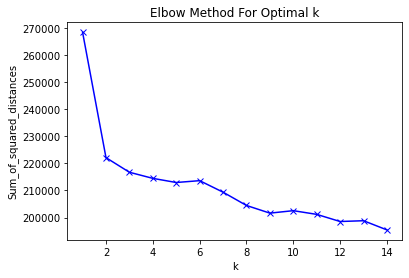

In [76]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

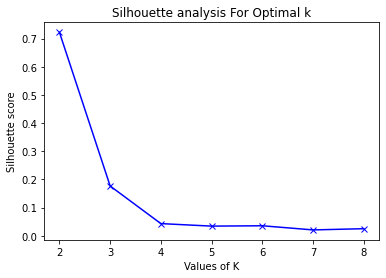

In [44]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [55]:
tfidf_vect = TfidfVectorizer(min_df=5, norm=None)
transformed_job_desc = tfidf_vect.fit_transform(df['JobDescription'])

In [50]:
#!pip install wordcloud

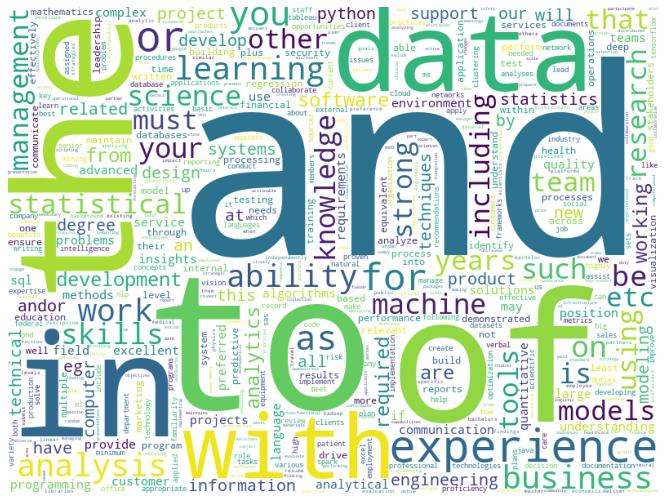

In [52]:
from wordcloud import WordCloud
freqs_dict = dict([(word, transformed_job_desc.getcol(idx).sum()) for word, idx in tfidf_vect.vocabulary_.items()])
w = WordCloud(width=800,height=600,mode='RGBA',background_color='white',max_words=500).fit_words(freqs_dict)
plt.figure(figsize=(12,9))
plt.imshow(w)
plt.axis("off")
plt.show() 

In [58]:
from sklearn.feature_extraction import text

tfidf_vect = TfidfVectorizer(min_df=5, norm=None, stop_words=text.ENGLISH_STOP_WORDS)
transformed_job_desc = tfidf_vect.fit_transform(df['JobDescription'])

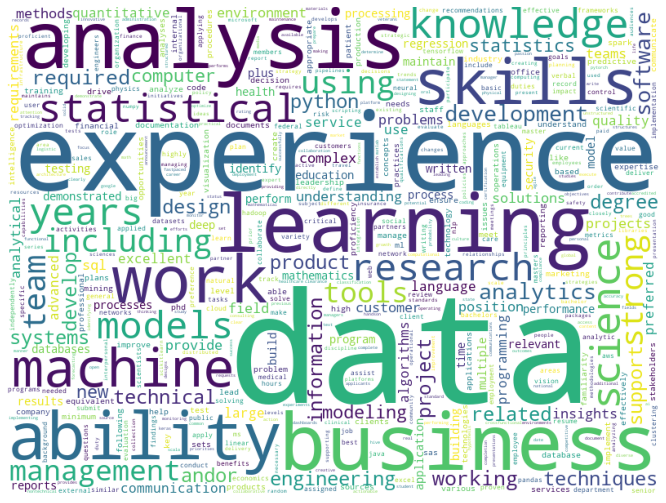

In [59]:
from wordcloud import WordCloud
freqs_dict = dict([(word, transformed_job_desc.getcol(idx).sum()) for word, idx in tfidf_vect.vocabulary_.items()])
w = WordCloud(width=800,height=600,mode='RGBA',background_color='white',max_words=500).fit_words(freqs_dict)
plt.figure(figsize=(12,9))
plt.imshow(w)
plt.axis("off")
plt.show() 

In [77]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(df['JobDescription'])
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
        max_iter=50, random_state=0) 

document_topics = lda.fit_transform(X)
lda.components_.shape

(10, 10000)

In [78]:
import mglearn

# Get the feature names from the vectorizer
feature_names = np.array(vect.get_feature_names())
#descending sort
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                                sorting= sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
nlp           patient       procedures    cloud         health        
natural       care          assigned      code          minimum       
ml            patients      needed        aws           develops      
pandas        health        assist        like          may           
neural        reporting     system        big           consulting    
computational center        equipment     database      sas           
libraries     appropriate   staff         pipelines     plans         
keras         medical       plans         platforms     effective     
pytorch       procedures    duties        distributed   designs       
following     staff         review        frameworks    maintains     


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
mark

In [65]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch", max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [66]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                               sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
proficient    statement     networks      enterprise    aws           linguistics   test          
weather       teaching      neural        visualizationsredshift      demonstrates  event         
treatment     optional      clustering    changes       emr           different     health        
physician     contributions mining        qualitative   preparing     levels        review        
children      diversity     company       hotel         s3            nlp           coordinates   
frameworks    letter        accuracy      propensity    biological    changes       scientific    
implementationcover         variety       marketing     ec2           specific      independently 
application   curriculum    manipulate    strategic     performing    area          prepares      
sox       